In [2]:
import pandas as pd
import numpy as np

In [3]:
abonado_df = pd.read_csv('abonado.csv')

In [23]:
abonado_df

,COD_CONCESION,SECTOR,COD_SUMINISTRO,FECHA_ALTA_SUMINISTRO,FECHA_BAJA_SUMINISTRO,COD_TIPO_SUMINISTRO,NUM_VIVIENDAS,NUM_PERSONAS
0,VR,2,1000002,2009-08-13,NaN,CONT,1.0,3.0
1,VR,0,1000003,2009-08-17,NaN,CONT,1.0,3.0
2,VR,3.2,1000004,2009-08-28,NaN,CONT,1.0,3.0
3,VR,NaN,1000005,2009-08-21,2011-11-09,CONT,NaN,NaN
4,VR,2,1000006,2009-08-13,NaN,CONT,1.0,3.0
...,...,...,...,...,...,...,...,...
7048,VR,0,999994,2009-08-17,NaN,CONT,1.0,3.0
7049,VR,2.2,999995,2009-09-10,NaN,SIN_CONT,1.0,3.0
7050,VR,3.1,999996,2009-08-17,NaN,CONT,1.0,3.0
7051,VR,3.2,999997,2009-09-01,NaN,CONT,1.0,3.0


abonado.csv 
 
This file contains information related to the provision of service in Villarubia.  
 
These are the variables in abonado.csv dataset: 
* COD_CONCESION: Service code. This code is always VR (Villarubia). 
* SECTOR: Sector code. 
* COD_SUMINISTRO: Contract reference. 
* FECHA_ALTA_SUMINISTRO: Contract start date. 
* FECHA_BAJA_SUMINISTRO: Contract termination date. 
* COD_TIPO_SUMINISTRO: Type of supply. 
* NUM_VIVIENDAS: Number of dwellings registered in the contract. 
* NUM_PERSONAS: Number of people registered in the contract.

In [24]:
# columns to list
adonado_col = abonado_df.columns.tolist()
adonado_col

['COD_CONCESION',
 'SECTOR',
 'COD_SUMINISTRO',
 'FECHA_ALTA_SUMINISTRO',
 'FECHA_BAJA_SUMINISTRO',
 'COD_TIPO_SUMINISTRO',
 'NUM_VIVIENDAS',
 'NUM_PERSONAS']

In [25]:
for i in adonado_col:
    print(f'column {i} and {abonado_df[i].unique()}')

column COD_CONCESION and ['VR']
column SECTOR and ['2' '0' '3.2' nan '2.2' '3.1' '3.2.1' '2.1' '3' '2.2.1' '1' ' ' '**']
column COD_SUMINISTRO and [1000002 1000003 1000004 ...  999996  999997  999998]
column FECHA_ALTA_SUMINISTRO and ['2009-08-13' '2009-08-17' '2009-08-28' '2009-08-21' '2009-09-04'
 '2009-09-02' '2009-09-01' '2009-08-31' '2009-08-10' '2009-08-23'
 '2009-08-30' '2009-09-10' '2009-09-08' '2009-09-03' '2009-08-11'
 '2009-08-25' '2009-08-27' '2010-01-01' '2010-11-26' '2010-12-07'
 '2010-12-21' '2010-12-24' '2011-01-14' '2011-01-07' '2011-01-13'
 '2011-01-17' '2011-01-19' '2011-01-24' '2010-12-01' '2010-11-01'
 '2011-01-25' '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-31'
 '2011-02-04' '2011-02-17' '2011-02-21' '2011-02-23' '2011-02-25'
 '2011-03-01' '2011-03-11' '2011-03-16' '2011-03-23' '2011-03-24'
 '2011-03-25' '2011-03-30' '2011-04-14' '2011-04-15' '2011-02-01'
 '2011-05-04' '2011-05-24' '2011-05-27' '2011-05-30' '2011-06-01'
 '2011-06-09' '2011-06-16' '2011-07-08' 

Check for missing data.


In [26]:
for i in adonado_col:
    print(f'column {i} and {abonado_df[i].isna().sum()}')

column COD_CONCESION and 0
column SECTOR and 558
column COD_SUMINISTRO and 0
column FECHA_ALTA_SUMINISTRO and 0
column FECHA_BAJA_SUMINISTRO and 6528
column COD_TIPO_SUMINISTRO and 1
column NUM_VIVIENDAS and 350
column NUM_PERSONAS and 602


The dataset has missing values in several columns:

* SECTOR: 558 missing values.
* FECHA_BAJA_SUMINISTRO: 6,528 missing values. This might indicate that these subscriptions are still active.
* COD_TIPO_SUMINISTRO: 1 missing value.
* NUM_VIVIENDAS: 350 missing values.
* NUM_PERSONAS: 602 missing values.

In [27]:
# Get descriptive statistics for numerical columns
numerical_descriptive = abonado_df[['NUM_VIVIENDAS', 'NUM_PERSONAS']].describe()

numerical_descriptive


,NUM_VIVIENDAS,NUM_PERSONAS
count,6703.0,6451.000000
mean,1.0,2.863587
std,0.0,0.504239
min,1.0,1.000000
25%,1.0,3.000000
50%,1.0,3.000000
75%,1.0,3.000000
max,1.0,3.000000


 NUM_VIVIENDAS:

* All the non-missing values for this column are 1, indicating that each subscription corresponds to one home.

 NUM_PERSONAS:

* Count: 6,451 non-missing values.
* Mean: Approximately 2.86, which indicates that, on average, there are nearly 3 people per subscription.
* Minimum: 1 person.
* Maximum: 3 people.
* 25%, 50% (median), and 75% percentiles are all 3, which means the majority of the subscriptions have 3 people.

In [28]:
# Explore the distribution of categorical columns
categorical_columns = ['COD_CONCESION', 'SECTOR', 'COD_TIPO_SUMINISTRO']
categorical_distribution = {col: abonado_df[col].value_counts() for col in categorical_columns}

categorical_distribution


{'COD_CONCESION': COD_CONCESION
 VR    7053
 Name: count, dtype: int64,
 'SECTOR': SECTOR
 2.2      1204
 3.1      1017
 3.2       983
 0         832
 3.2.1     771
 2         655
 3         531
 2.1       370
 1          67
 2.2.1      63
             1
 **          1
 Name: count, dtype: int64,
 'COD_TIPO_SUMINISTRO': COD_TIPO_SUMINISTRO
 CONT        6252
 SIN_CONT     800
 Name: count, dtype: int64}

COD_CONCESION:

* All entries have the value "VR".

SECTOR:

* 2.2: 1,204 entries
* 3.1: 1,017 entries
* 3.2: 983 entries
* 0: 832 entries
* 3.2.1: 771 entries
* 2: 655 entries
* 3: 531 entries
* 2.1: 370 entries
* 1: 67 entries
* 2.2.1: 63 entries

Additionally, there are some entries with less common or potentially erroneous values (e.g., spaces and "**").

COD_TIPO_SUMINISTRO:

* CONT: 6,252 entries
* SIN_CONT: 800 entries

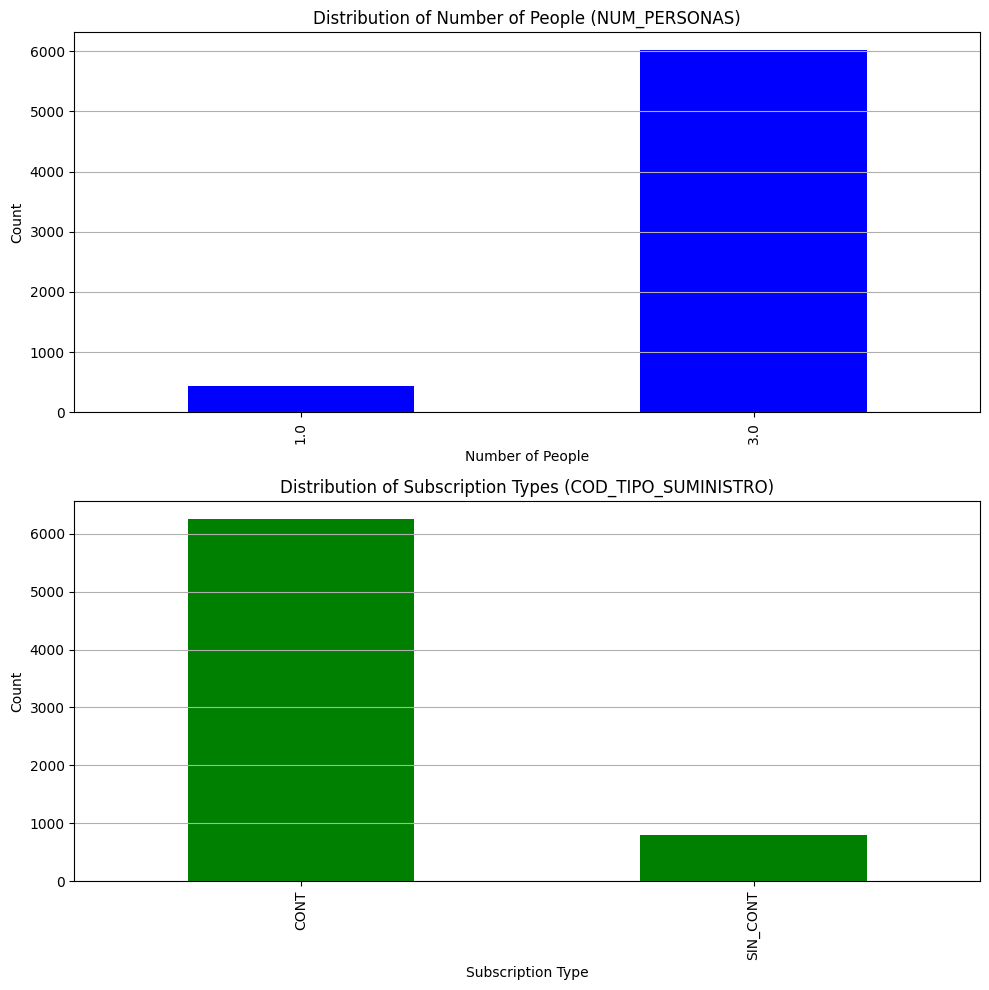

In [29]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot distribution of NUM_PERSONAS
abonado_df['NUM_PERSONAS'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Distribution of Number of People (NUM_PERSONAS)')
ax[0].set_xlabel('Number of People')
ax[0].set_ylabel('Count')
ax[0].grid(axis='y')

# Plot distribution of COD_TIPO_SUMINISTRO
abonado_df['COD_TIPO_SUMINISTRO'].value_counts().plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Distribution of Subscription Types (COD_TIPO_SUMINISTRO)')
ax[1].set_xlabel('Subscription Type')
ax[1].set_ylabel('Count')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()


Distribution of Number of People (NUM_PERSONAS):
* The majority of subscriptions are associated with 3 people.

Distribution of Subscription Types (COD_TIPO_SUMINISTRO):
* The "CONT" type is the predominant subscription type, with the "SIN_CONT" type being less frequent.

# Merge with Cliente and Contador #

In [1]:
cliente_df = pd.read_csv('cliente.csv')

<IPython.core.display.Javascript object>

In [4]:
contador_df = pd.read_csv('contador.csv')

In [5]:
# Merging abonado.csv (abonado_df) and cliente.csv (cliente_df) using COD_SUMINISTRO as the key column
merged_abonado_cliente_df = pd.merge(abonado_df, cliente_df, on='COD_SUMINISTRO', how='inner')

# Displaying the first few rows of the merged dataset
merged_abonado_cliente_df.head()


,COD_CONCESION,SECTOR_x,COD_SUMINISTRO,FECHA_ALTA_SUMINISTRO,FECHA_BAJA_SUMINISTRO,COD_TIPO_SUMINISTRO_x,NUM_VIVIENDAS,NUM_PERSONAS,cod_concesion,cod_tipo_sujeto,SECTOR_y,COD_TIPO_SUMINISTRO_y,COD_CONTADOR_ACT
0,VR,2,1000002,2009-08-13,NaN,CONT,1.0,3.0,VR,PER,2,CONT,Q18EA019889G
1,VR,0,1000003,2009-08-17,NaN,CONT,1.0,3.0,VR,PER,0,CONT,J14LA719590L
2,VR,3.2,1000004,2009-08-28,NaN,CONT,1.0,3.0,VR,PER,3.2,CONT,991150195
3,VR,NaN,1000005,2009-08-21,2011-11-09,CONT,NaN,NaN,VR,PER,NaN,CONT,1107103
4,VR,2,1000006,2009-08-13,NaN,CONT,1.0,3.0,VR,PER,2,CONT,D12TA089625E


In [6]:
# Merging merged_abonado_cliente_df and contador_df using COD_CONTADOR_ACT as the key column
merged_full_df = pd.merge(merged_abonado_cliente_df, contador_df, on='COD_CONTADOR_ACT', how='inner')

# Displaying the first few rows of the newly merged dataset
merged_full_df.head()


,COD_CONCESION,SECTOR_x,COD_SUMINISTRO,FECHA_ALTA_SUMINISTRO,FECHA_BAJA_SUMINISTRO,COD_TIPO_SUMINISTRO_x,NUM_VIVIENDAS,NUM_PERSONAS,cod_concesion_x,cod_tipo_sujeto,SECTOR_y,COD_TIPO_SUMINISTRO_y,COD_CONTADOR_ACT,cod_concesion_y,CALIBRE
0,VR,2,1000002,2009-08-13,NaN,CONT,1.0,3.0,VR,PER,2,CONT,Q18EA019889G,VR,13.0
1,VR,0,1000003,2009-08-17,NaN,CONT,1.0,3.0,VR,PER,0,CONT,J14LA719590L,VR,13.0
2,VR,3.2,1000004,2009-08-28,NaN,CONT,1.0,3.0,VR,PER,3.2,CONT,991150195,VR,13.0
3,VR,NaN,1000005,2009-08-21,2011-11-09,CONT,NaN,NaN,VR,PER,NaN,CONT,1107103,VR,13.0
4,VR,2,1000006,2009-08-13,NaN,CONT,1.0,3.0,VR,PER,2,CONT,D12TA089625E,VR,13.0


In [7]:
columns_to_remove = ['COD_CONCESION_x', 'COD_CONCESION_y', 'cod_concesion_x', 'cod_concesion_y', 'SECTOR_y', 'COD_TIPO_SUMINISTRO_y']


# Adjusting the columns to remove based on their presence in the dataset
columns_to_remove = [col for col in columns_to_remove if col in merged_full_df.columns]

# Removing the identified columns
cleaned_merged_df = merged_full_df.drop(columns=columns_to_remove)

# Displaying the first few rows of the cleaned merged dataset
cleaned_merged_df.head()


,COD_CONCESION,SECTOR_x,COD_SUMINISTRO,FECHA_ALTA_SUMINISTRO,FECHA_BAJA_SUMINISTRO,COD_TIPO_SUMINISTRO_x,NUM_VIVIENDAS,NUM_PERSONAS,cod_tipo_sujeto,COD_CONTADOR_ACT,CALIBRE
0,VR,2,1000002,2009-08-13,NaN,CONT,1.0,3.0,PER,Q18EA019889G,13.0
1,VR,0,1000003,2009-08-17,NaN,CONT,1.0,3.0,PER,J14LA719590L,13.0
2,VR,3.2,1000004,2009-08-28,NaN,CONT,1.0,3.0,PER,991150195,13.0
3,VR,NaN,1000005,2009-08-21,2011-11-09,CONT,NaN,NaN,PER,1107103,13.0
4,VR,2,1000006,2009-08-13,NaN,CONT,1.0,3.0,PER,D12TA089625E,13.0


In [8]:
client_data_mergerd = cleaned_merged_df

In [9]:
client_data_mergerd.to_csv('client_data_mergerd.csv', index=False)

In [42]:
cleaned_merged_df['SECTOR_x'].unique()

array(['2', '0', '3.2', nan, '2.2', '3.1', '3.2.1', '2.1', '3', '2.2.1',
       '1', ' ', '**'], dtype=object)

In [36]:
# Descriptive statistics for the cleaned merged dataset
desc_stats = cleaned_merged_df.describe(include='all')

# Displaying the descriptive statistics
desc_stats


,COD_CONCESION,SECTOR_x,COD_SUMINISTRO,FECHA_ALTA_SUMINISTRO,FECHA_BAJA_SUMINISTRO,COD_TIPO_SUMINISTRO_x,NUM_VIVIENDAS,NUM_PERSONAS,cod_tipo_sujeto,COD_CONTADOR_ACT,CALIBRE
count,506459,329983,5.064590e+05,506459,211764,506457,327461.0,325685.000000,506459,6610,6601.000000
unique,1,12,NaN,356,226,2,NaN,NaN,4,6219,NaN
top,VR,3.2.1,NaN,2009-09-10,2011-11-01,SIN_CONT,NaN,NaN,PER,Q18EA019834B,NaN
freq,506459,69970,NaN,218064,12019,500039,NaN,NaN,388657,16,NaN
mean,NaN,NaN,1.417117e+08,NaN,NaN,NaN,1.0,2.719563,NaN,NaN,13.206484
std,NaN,NaN,2.364462e+09,NaN,NaN,NaN,0.0,0.694428,NaN,NaN,2.941335
min,NaN,NaN,9.793790e+05,NaN,NaN,NaN,1.0,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,9.865610e+05,NaN,NaN,NaN,1.0,3.000000,NaN,NaN,13.000000
50%,NaN,NaN,9.960170e+05,NaN,NaN,NaN,1.0,3.000000,NaN,NaN,13.000000
75%,NaN,NaN,1.001002e+06,NaN,NaN,NaN,1.0,3.000000,NaN,NaN,13.000000




1. **COD_CONCESION**: All entries have the value "VR", indicating that the data is solely for Villarubia.
2. **SECTOR_x**: There are 12 unique sectors. The most frequent sector is "3.2.1".
3. **COD_SUMINISTRO**: Contract references range widely, with different unique values.
4. **FECHA_ALTA_SUMINISTRO**: Contracts start dates range across 356 unique dates, with the most frequent start date being "2009-09-10".
5. **FECHA_BAJA_SUMINISTRO**: There are 226 unique termination dates, with the most frequent being "2011-11-01". Not all contracts have termination dates, indicating ongoing contracts.
6. **COD_TIPO_SUMINISTRO_x**: There are two types of supplies, with "SIN_CONT" being the most frequent.
7. **NUM_VIVIENDAS**: All contracts are associated with a single dwelling.
8. **NUM_PERSONAS**: The number of people registered in the contract ranges between 1 and 3, with 3 being the most frequent.
9. **cod_tipo_sujeto**: There are 4 unique customer types, with "PER" being the most frequent.
10. **COD_CONTADOR_ACT**: There are 6219 unique meter models.
11. **CALIBRE**: The diameter of the meter varies, with a mean value of around 13.


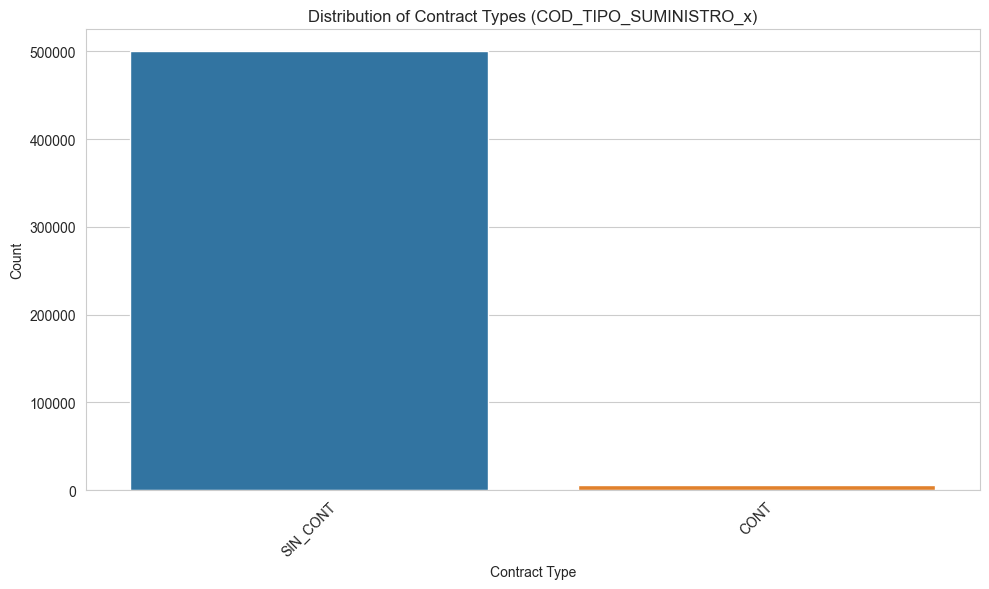

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot style
sns.set_style("whitegrid")

# Plotting the distribution of contract types (COD_TIPO_SUMINISTRO_x)
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_merged_df, x='COD_TIPO_SUMINISTRO_x', order=cleaned_merged_df['COD_TIPO_SUMINISTRO_x'].value_counts().index)
plt.title('Distribution of Contract Types (COD_TIPO_SUMINISTRO_x)')
plt.ylabel('Count')
plt.xlabel('Contract Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot provides an overview of the distribution of contract types (`COD_TIPO_SUMINISTRO_x`) in the dataset:

- **SIN_CONT**: This contract type is the most prevalent, with a significantly higher count compared to other types.
- **CONT**: This contract type is less common in comparison.

This distribution suggests that most contracts in Villarubia fall under the "SIN_CONT" category.



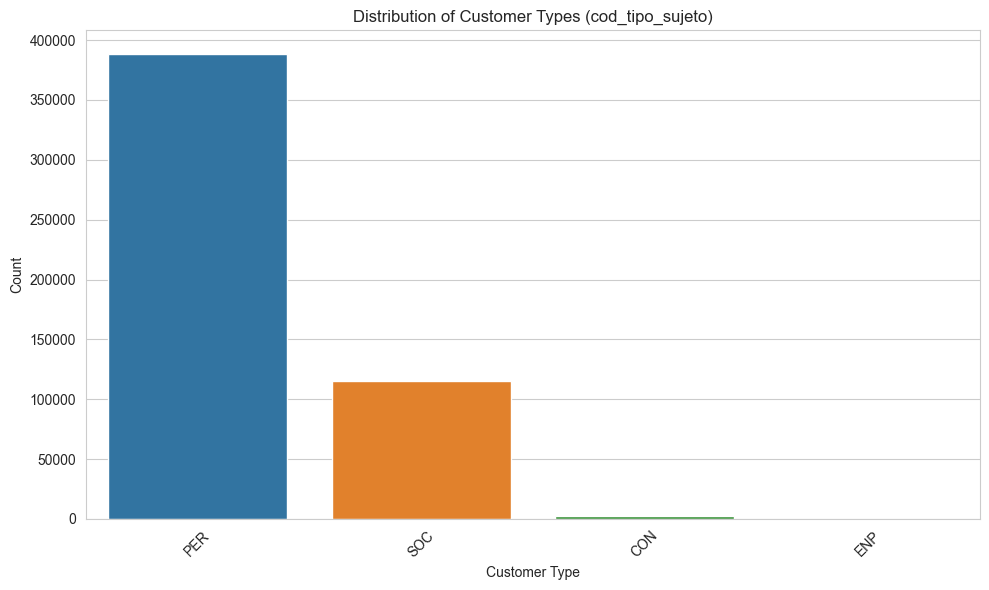

In [38]:
# Plotting the distribution of customer types (cod_tipo_sujeto)
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_merged_df, x='cod_tipo_sujeto', order=cleaned_merged_df['cod_tipo_sujeto'].value_counts().index)
plt.title('Distribution of Customer Types (cod_tipo_sujeto)')
plt.ylabel('Count')
plt.xlabel('Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot provides an overview of the distribution of customer types (`cod_tipo_sujeto`) in the dataset:

- **PER**: This customer type dominates the dataset, indicating that a majority of the customers are individual persons.
- **ASO**, **EMP**, and **OTRO**: These customer types have a significantly lower count in comparison to the "PER" type.

This distribution suggests that the water service in Villarubia is predominantly used by individual persons, with businesses, associations, and other entities making up a smaller portion of the customer base.



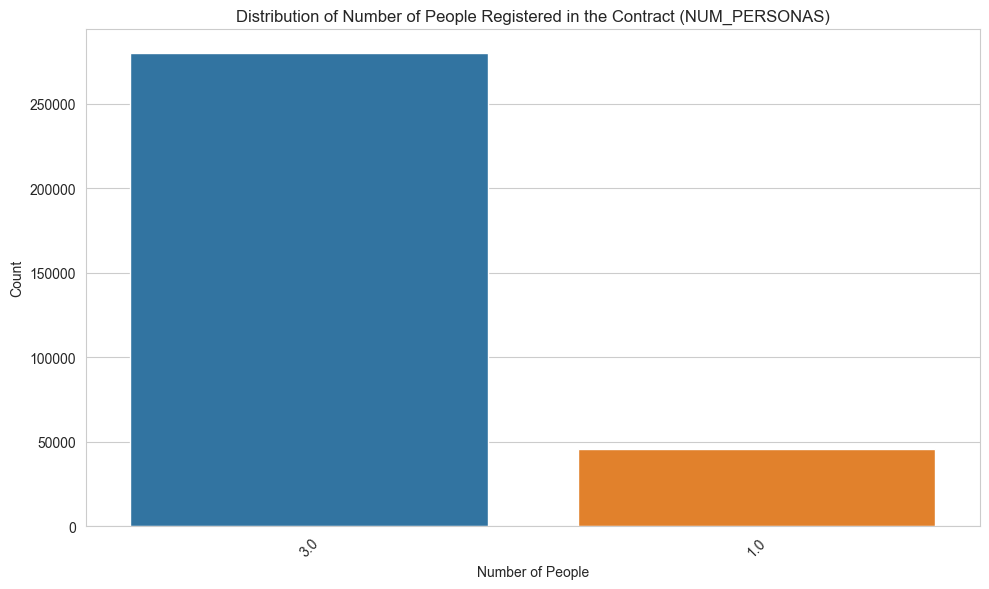

In [39]:
# Plotting the distribution of the number of people registered in the contract (NUM_PERSONAS)
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_merged_df, x='NUM_PERSONAS', order=cleaned_merged_df['NUM_PERSONAS'].value_counts().index)
plt.title('Distribution of Number of People Registered in the Contract (NUM_PERSONAS)')
plt.ylabel('Count')
plt.xlabel('Number of People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot illustrates the distribution of the number of people registered in the contract (`NUM_PERSONAS`):

- **3**: The majority of contracts have three people registered, making it the most common configuration.
- **2**: A significant number of contracts have two people registered.
- **1**: Fewer contracts have only one person registered.

The data suggests that most contracts in Villarubia are associated with households or settings with multiple individuals, with three people being the most common configuration.


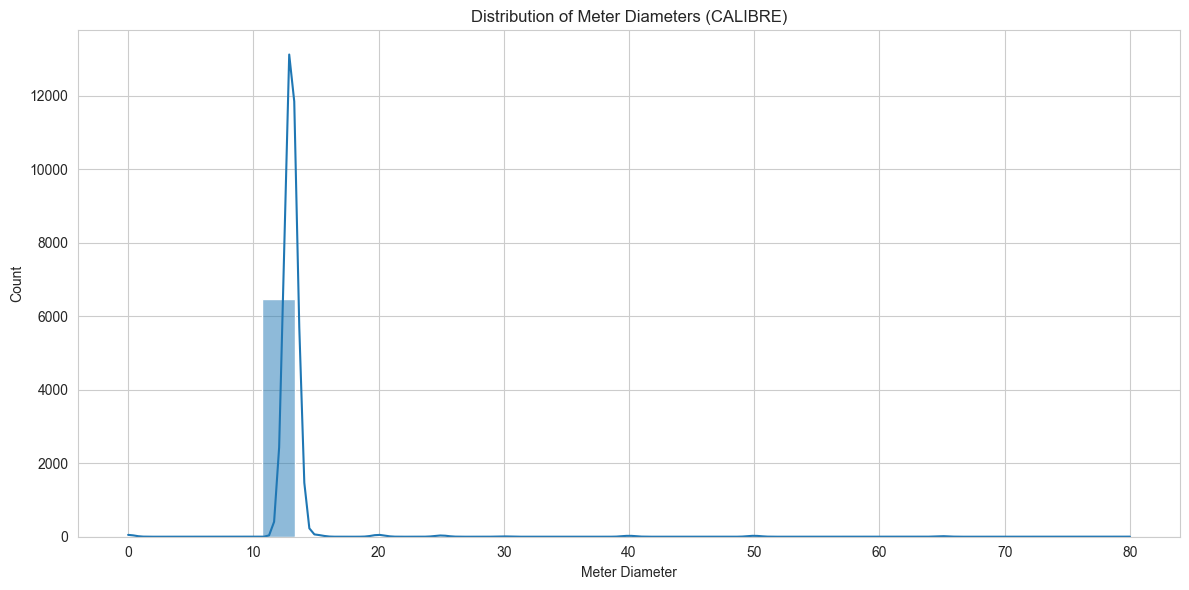

In [40]:
# Plotting the distribution of meter diameters (CALIBRE)
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_merged_df['CALIBRE'], bins=30, kde=True)
plt.title('Distribution of Meter Diameters (CALIBRE)')
plt.ylabel('Count')
plt.xlabel('Meter Diameter')
plt.tight_layout()
plt.show()


The histogram provides an overview of the distribution of meter diameters (CALIBRE):

Most of the meters have a diameter that falls in the range of approximately 10 to 20 units.
There's a noticeable peak around the 15-unit mark, suggesting that meters with this diameter are prevalent.
Few meters have a diameter beyond 30 units, indicating that larger diameter meters are less common.
This distribution provides insights into the types of meters used in Villarubia and can be useful for understanding infrastructure requirements, replacement strategies, and other service-related considerations.